In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction/Diabetes_prediction.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# **1. Data Import**

In [3]:
df = pd.read_csv('/kaggle/input/diabetes-prediction/Diabetes_prediction.csv', index_col=False)

* **Pregnancies : Number of pregnancies the individual has had.**
* **Glucose : Plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test.**
* **BloodPressure : Diastolic blood pressure (mm Hg).**
* **SkinThickness : Thickness of skinfold (mm) at the triceps.**
* **Insulin : 2-Hour serum insulin (mu U/ml).**
* **BMI : 2-Hour serum insulin (mu U/ml).**
* **DiabetesPedigreeFunction : Diabetes pedigree function, which represents the likelihood of diabetes based on family history.**
* **Age : Age of the individual (years).**
* **Diagnosis : Binary label indicating whether the individual has diabetes (1) or not (0).**

# 1-1. Data Structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


# 1-2. Data processing

In [8]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

for i in cols:
    df[i] = round(df[i],2)

df = df.astype({'Age':'int64'})

# **2. Visualization**

# Correlation

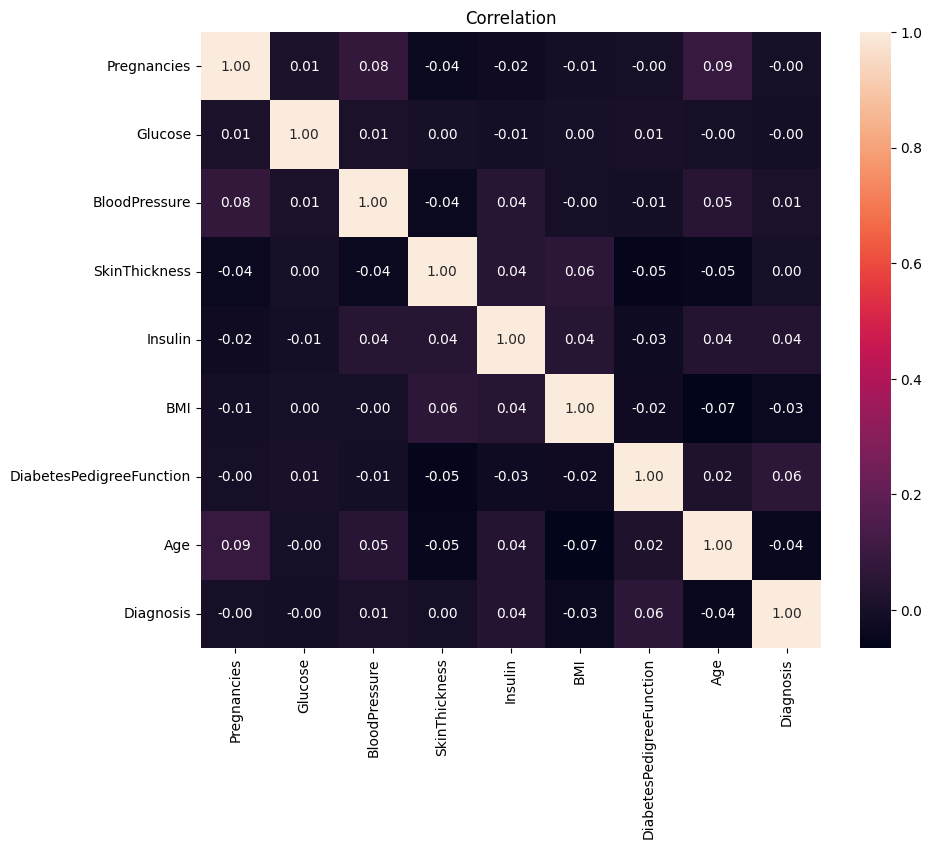

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", )
plt.title('Correlation')
plt.show()

# Histogram

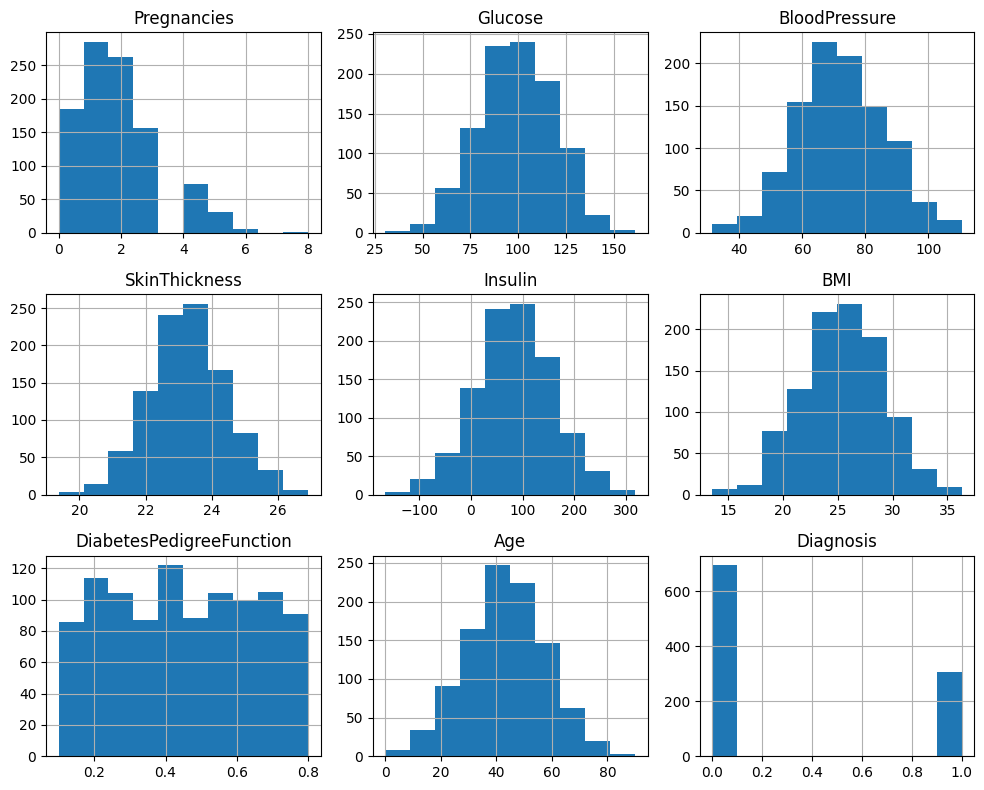

In [10]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Relationship of variables(for Diagnosis)
# BMI vs Variable

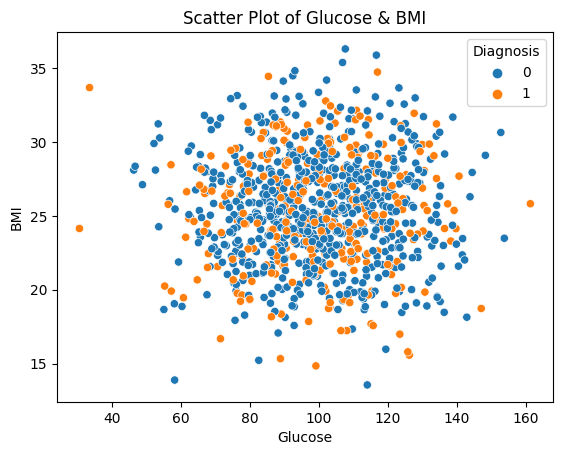

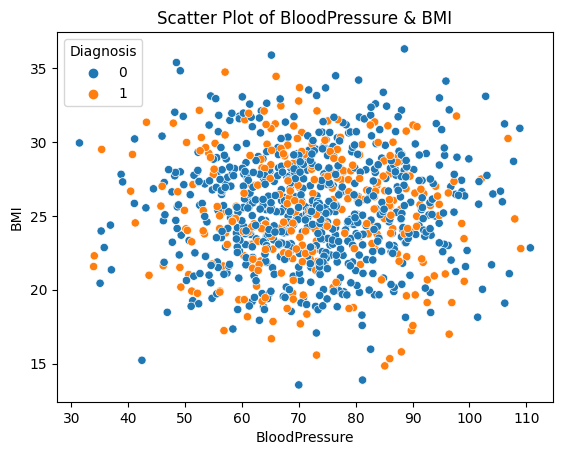

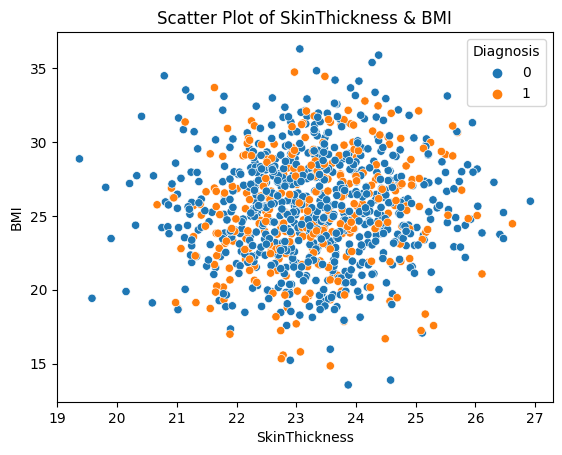

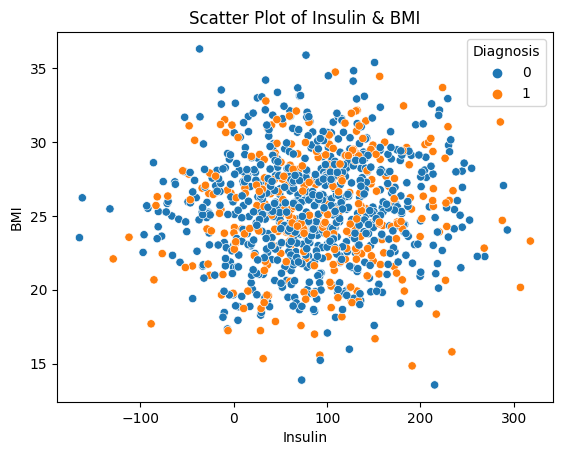

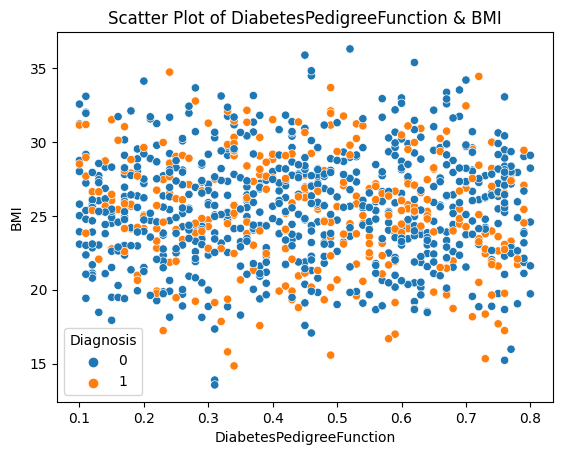

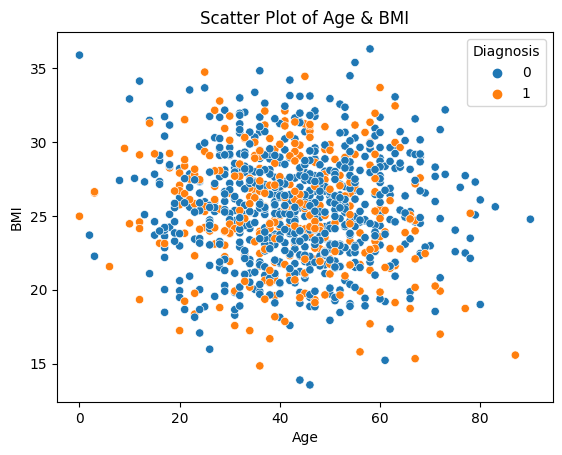

In [55]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']

for i in cols:
    sns.scatterplot(x=df[i], y=df['BMI'], hue='Diagnosis', data=df)
    plt.title(f'Scatter Plot of {i} & BMI')
    plt.ylabel('BMI')
    plt.xlabel(f'{i}')
    plt.show()

# BoxPlot of Diagnosis (for variables)

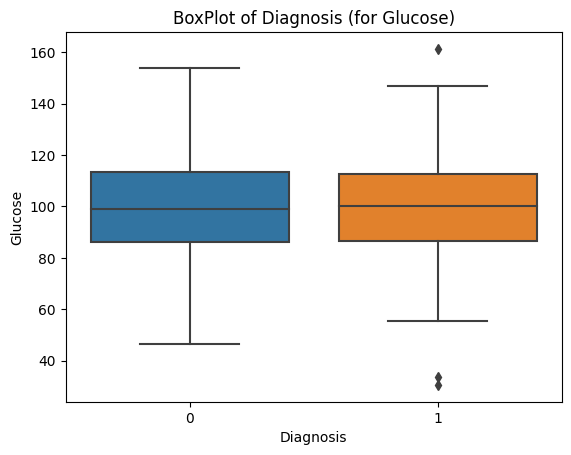

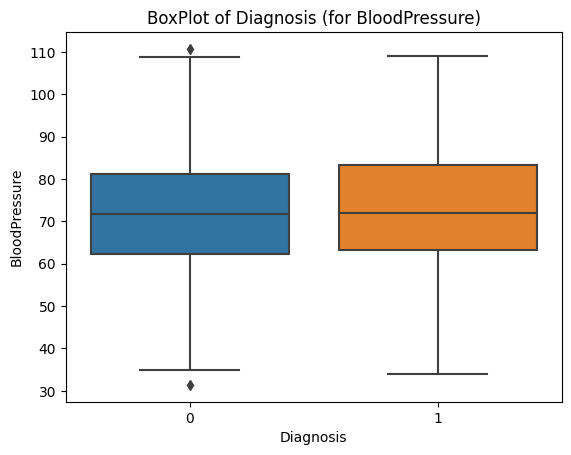

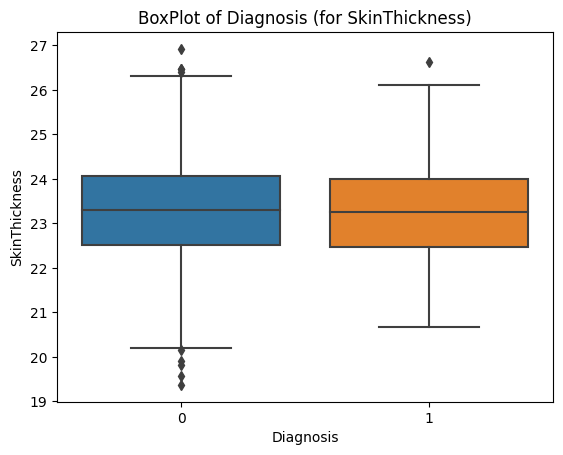

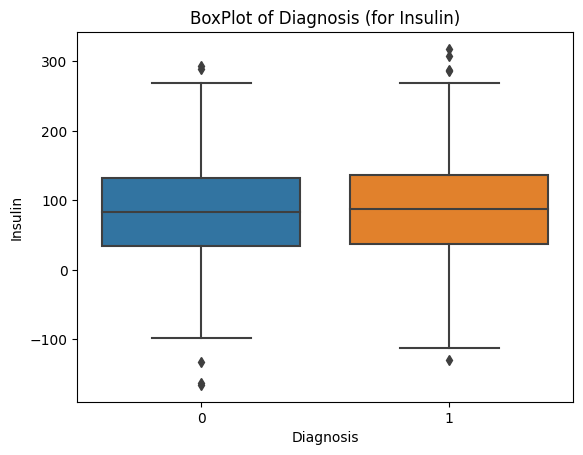

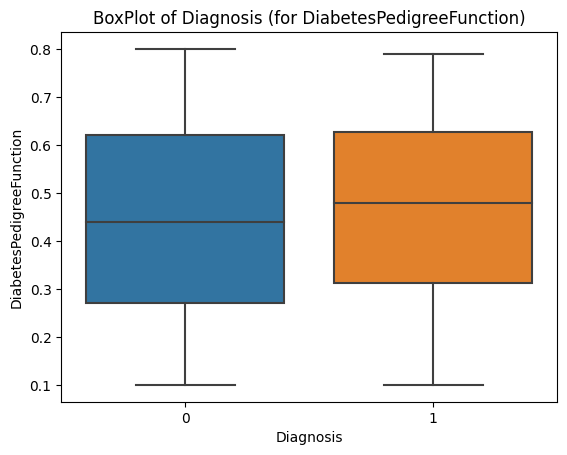

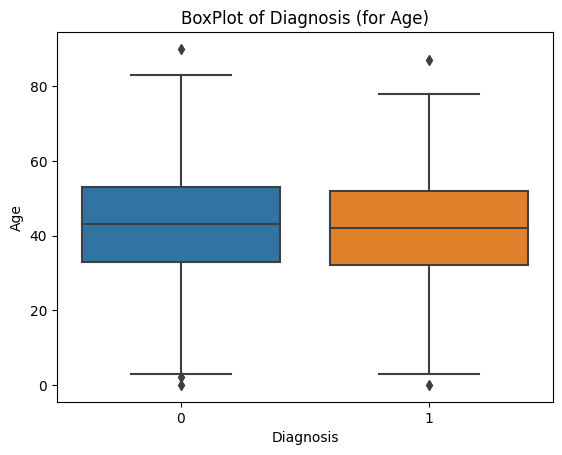

In [65]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']

for i in cols:
    sns.boxplot(x=df['Diagnosis'], y=df[i], data=df)
    plt.title(f'BoxPlot of Diagnosis (for {i})')
    plt.ylabel(f'{i}')
    plt.show()

# **3. Modeling**

# 3-1. Import

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [67]:
X = df.drop('Diagnosis', axis=1)
Y = df['Diagnosis']

X_train,X_test,Y_train,Y_test =train_test_split(X, Y, test_size=0.2, random_state=42)

# 3-2. LogisticRegression

In [68]:
md_LR = LogisticRegression()

In [69]:
md_LR.fit(X_train,Y_train)

LogisticRegression()

In [70]:
pred1 = md_LR.predict(X_test)

In [79]:
confusion_matrix(Y_test,pred1)

array([[137,   0],
       [ 63,   0]])

In [87]:
accuracy = accuracy_score(Y_test, pred1)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(Y_test, pred1)
print(f'precision: {precision:.2f}')

recall = recall_score(Y_test, pred1)
print(f'recall: {recall:.2f}')

f1 = f1_score(Y_test, pred1)
print(f'f1: {f1:.2f}')

Accuracy: 0.69
precision: 0.00
recall: 0.00
f1: 0.00


# 3-3. RandomForestClassifier

In [90]:
md_RF = RandomForestClassifier()

In [91]:
md_RF.fit(X_train,Y_train)

RandomForestClassifier()

In [92]:
pred2 = md_RF.predict(X_test)

In [93]:
confusion_matrix(Y_test,pred2)

array([[123,  14],
       [ 62,   1]])

In [95]:
accuracy = accuracy_score(Y_test, pred2)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(Y_test, pred2)
print(f'precision: {precision:.2f}')

recall = recall_score(Y_test, pred2)
print(f'recall: {recall:.2f}')

f1 = f1_score(Y_test, pred2)
print(f'f1: {f1:.2f}')

Accuracy: 0.62
precision: 0.07
recall: 0.02
f1: 0.03


# 3-4. Evaluation

# LogisticRegression is a better model because its accuracy is higher than RandomForest.